<h1 style="background-color: rgb(80, 200, 230);padding:10px;border-radius:10px 10px 10px 10px;text-align:center">TPS Sep22 EDA

<h1 style="color:rgb(80, 200, 230);margin: 10px"><b>Overview<b/>

<p style="background-color: rgba(80, 200, 230, 0.5);padding:10px;border-radius:10px 10px 10px 10px">
The competing Kaggle merchandise stores we saw in January's Tabular Playground are at it again. This time, they're selling books!<br>
The task for this month's competitions is a bit more complicated. Not only are there six countries and four books to forecast, but you're being asked to forecast sales during the tumultuous year 2021. Can you use your data science skills to predict book sales when conditions are far from the ordinary?</p>

<h1 style="color:rgb(80, 200, 230);margin: 10px"><b>Importing Libraries<b/>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 10]

<h1 style="color:rgb(80, 200, 230);margin: 10px"><b>Loading Data<b/>

In [2]:
train_data = pd.read_csv('train.csv', index_col='date', parse_dates=['date'])
test_data = pd.read_csv('test.csv', index_col='date', parse_dates=['date'])
train_data

row_id  country       store                           product  \
date                                                                        
2017-01-01       0  Belgium  KaggleMart        Kaggle Advanced Techniques   
2017-01-01       1  Belgium  KaggleMart            Kaggle Getting Started   
2017-01-01       2  Belgium  KaggleMart                Kaggle Recipe Book   
2017-01-01       3  Belgium  KaggleMart  Kaggle for Kids: One Smart Goose   
2017-01-01       4  Belgium  KaggleRama        Kaggle Advanced Techniques   
...            ...      ...         ...                               ...   
2020-12-31   70123    Spain  KaggleMart  Kaggle for Kids: One Smart Goose   
2020-12-31   70124    Spain  KaggleRama        Kaggle Advanced Techniques   
2020-12-31   70125    Spain  KaggleRama            Kaggle Getting Started   
2020-12-31   70126    Spain  KaggleRama                Kaggle Recipe Book   
2020-12-31   70127    Spain  KaggleRama  Kaggle for Kids: One Smart Goose   

            num_sold  
date                  
2017-01-01       663  
2017-01-01       615  
2017-01-01       480  
2017-01-01       710  
2017-01-01       240  
...              ...  
2020-12-31       614  
2020-12-31       215  
2020-12-31       158  
2020-12-31       135  
2020-12-31       202  

[70128 rows x 5 columns]

In [3]:
test_data.head()

row_id  country       store                           product
date                                                                     
2021-01-01   70128  Belgium  KaggleMart        Kaggle Advanced Techniques
2021-01-01   70129  Belgium  KaggleMart            Kaggle Getting Started
2021-01-01   70130  Belgium  KaggleMart                Kaggle Recipe Book
2021-01-01   70131  Belgium  KaggleMart  Kaggle for Kids: One Smart Goose
2021-01-01   70132  Belgium  KaggleRama        Kaggle Advanced Techniques

<h1 style="color:rgb(80, 200, 230);margin: 10px"><b>Exploratory Data Analysis<b/>

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70128 entries, 2017-01-01 to 2020-12-31
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   row_id    70128 non-null  int64 
 1   country   70128 non-null  object
 2   store     70128 non-null  object
 3   product   70128 non-null  object
 4   num_sold  70128 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 3.2+ MB


In [5]:
train_data.describe()

row_id      num_sold
count  70128.000000  70128.000000
mean   35063.500000    194.296986
std    20244.354176    126.893874
min        0.000000     19.000000
25%    17531.750000     95.000000
50%    35063.500000    148.000000
75%    52595.250000    283.000000
max    70127.000000    986.000000

<p style="background-color: rgba(80, 200, 230, 0.5);padding:10px;border-radius:10px 10px 10px 10px;width:1020px">
We can see that the minimum number of products sold a day are 19 and the average sold are 195 whereas max products sold are 986, which is far away from mean.<br>
This shows that there are some special days where the sales where skyrocketed.

In [6]:
train_data.isnull().sum()

row_id      0
country     0
store       0
product     0
num_sold    0
dtype: int64

<p style="background-color: rgba(80, 200, 230, 0.5);padding:10px;border-radius:10px 10px 10px 10px;width:260px">
There are no missing values in the data.

<span style="color:rgb(80, 200, 230);margin: 10px;font-size:18px"><b>Categorical Variables<b/> 

In [7]:
[f'{i} : {train_data.loc[:, i].unique().tolist()}' for i in train_data.select_dtypes(include=['O']).columns]

["country : ['Belgium', 'France', 'Germany', 'Italy', 'Poland', 'Spain']",
 "store : ['KaggleMart', 'KaggleRama']",
 "product : ['Kaggle Advanced Techniques', 'Kaggle Getting Started', 'Kaggle Recipe Book', 'Kaggle for Kids: One Smart Goose']"]

<h2 style="color:rgb(80, 200, 230);margin: 10px"><b>Minimum, maximum, average number of products sold by each store in each country<b/>

In [8]:
train_data_gp = train_data.groupby(['country', 'store', 'product']).num_sold.agg(['min', 'max', 'mean'])
train_data_gp

min  max        mean
country store      product                                               
Belgium KaggleMart Kaggle Advanced Techniques        252  878  405.895962
                   Kaggle Getting Started            172  688  325.649555
                   Kaggle Recipe Book                146  581  243.922656
                   Kaggle for Kids: One Smart Goose  278  925  437.316222
        KaggleRama Kaggle Advanced Techniques         84  309  140.880219
                   Kaggle Getting Started             60  252  113.041068
                   Kaggle Recipe Book                 50  200   84.738535
                   Kaggle for Kids: One Smart Goose   98  328  152.080767
France  KaggleMart Kaggle Advanced Techniques        235  773  366.978097
                   Kaggle Getting Started            180  625  294.089665
                   Kaggle Recipe Book                142  479  220.158795
                   Kaggle for Kids: One Smart Goose  282  804  395.650240
        KaggleRama Kaggle Advanced Techniques         81  261  127.389459
                   Kaggle Getting Started             57  204  101.869268
                   Kaggle Recipe Book                 46  172   76.188912
                   Kaggle for Kids: One Smart Goose   96  277  137.264203
Germany KaggleMart Kaggle Advanced Techniques        257  889  406.429158
                   Kaggle Getting Started            166  740  325.702259
                   Kaggle Recipe Book                142  576  244.533881
                   Kaggle for Kids: One Smart Goose  282  986  439.027379
        KaggleRama Kaggle Advanced Techniques         85  310  141.444216
                   Kaggle Getting Started             59  265  113.268309
                   Kaggle Recipe Book                 48  218   84.728268
                   Kaggle for Kids: One Smart Goose   94  354  152.063655
Italy   KaggleMart Kaggle Advanced Techniques        188  717  321.937029
                   Kaggle Getting Started            162  549  257.516769
                   Kaggle Recipe Book                130  508  192.754278
                   Kaggle for Kids: One Smart Goose  234  728  346.918549
        KaggleRama Kaggle Advanced Techniques         65  240  111.344969
                   Kaggle Getting Started             56  192   89.260096
                   Kaggle Recipe Book                 43  169   66.808350
                   Kaggle for Kids: One Smart Goose   85  263  120.025325
Poland  KaggleMart Kaggle Advanced Techniques         82  674  195.466119
                   Kaggle Getting Started             68  562  156.626283
                   Kaggle Recipe Book                 57  487  117.302533
                   Kaggle for Kids: One Smart Goose  101  761  212.738535
        KaggleRama Kaggle Advanced Techniques         29  235   67.574264
                   Kaggle Getting Started             24  199   54.306639
                   Kaggle Recipe Book                 19  168   40.559890
                   Kaggle for Kids: One Smart Goose   36  251   73.663244
Spain   KaggleMart Kaggle Advanced Techniques        167  616  292.252567
                   Kaggle Getting Started            139  510  234.632444
                   Kaggle Recipe Book                109  459  175.963039
                   Kaggle for Kids: One Smart Goose  213  711  315.420945
        KaggleRama Kaggle Advanced Techniques         56  234  101.333333
                   Kaggle Getting Started             47  182   81.130732
                   Kaggle Recipe Book                 38  157   60.702943
                   Kaggle for Kids: One Smart Goose   76  242  109.705681

<h1 style="color:rgb(80, 200, 230);margin: 10px"><b>Visualization<b/>

In [9]:
px.histogram(train_data, x='product', y='num_sold', color='country', facet_col='store')

<p style="background-color: rgba(80, 200, 230, 0.5);padding:10px;border-radius:10px 10px 10px 10px;width:1040px">
Kaggle for Kids: One Smart Goose is the most sold product followed by Kaggle Advanced Techniques, Kaggle Getting Started and Kaggle Recipe Book in both stores.

<h3 style="color:rgb(80, 200, 230);margin: 10px"><b>Daily Sales of Product<b/>

In [10]:
fig = px.line(train_data, x=train_data.index, y='num_sold', facet_col='store', facet_row='product', facet_row_spacing=0.15, facet_col_spacing=0.01,height=1000)
fig.show()

<p style="background-color: rgba(80, 200, 230, 0.5);padding:10px;border-radius:10px 10px 10px 10px;width:650px">
We can see that in both stores and for all the products there is a peck which is at the end of the year.<br>
So Christmas and New year are the occasions which can be responsible for high peck in seasionality.<br>
From 2020 onwards there is also a change that the sales are close to upper values.<br>
This will get clear if we see the monthly sales.

<h3 style="color:rgb(80, 200, 230);margin: 10px"><b>Monthly Sales<b/>

In [11]:
train_data_monthly = train_data.groupby(['country', 'store', 'product']).resample('M').mean()
train_data_monthly = train_data_monthly.reset_index(level=['country', 'store', 'product'])
train_data_monthly

country       store                           product   row_id  \
date                                                                         
2017-01-31  Belgium  KaggleMart        Kaggle Advanced Techniques    720.0   
2017-02-28  Belgium  KaggleMart        Kaggle Advanced Techniques   2136.0   
2017-03-31  Belgium  KaggleMart        Kaggle Advanced Techniques   3552.0   
2017-04-30  Belgium  KaggleMart        Kaggle Advanced Techniques   5016.0   
2017-05-31  Belgium  KaggleMart        Kaggle Advanced Techniques   6480.0   
...             ...         ...                               ...      ...   
2020-08-31    Spain  KaggleRama  Kaggle for Kids: One Smart Goose  63551.0   
2020-09-30    Spain  KaggleRama  Kaggle for Kids: One Smart Goose  65015.0   
2020-10-31    Spain  KaggleRama  Kaggle for Kids: One Smart Goose  66479.0   
2020-11-30    Spain  KaggleRama  Kaggle for Kids: One Smart Goose  67943.0   
2020-12-31    Spain  KaggleRama  Kaggle for Kids: One Smart Goose  69407.0   

              num_sold  
date                    
2017-01-31  430.483871  
2017-02-28  448.428571  
2017-03-31  456.032258  
2017-04-30  485.833333  
2017-05-31  462.516129  
...                ...  
2020-08-31  147.677419  
2020-09-30  141.800000  
2020-10-31  149.806452  
2020-11-30  147.900000  
2020-12-31  162.354839  

[2304 rows x 5 columns]

In [12]:
fig = px.line(train_data_monthly, x=train_data_monthly.index, y='num_sold', color='country', facet_col='store', facet_row='product', facet_row_spacing=0.15, height=1200)
fig.show()

<p style="background-color: rgba(80, 200, 230, 0.5);padding:10px;border-radius:10px 10px 10px 10px;width:750px">
Now it's clear!!<br>
We can understand that some countries especially Poland started with less sales(following seasonality), but from 2020 they got all increased and onwards showing nearly same trend and seasonality.

In [13]:
df = train_data.reset_index().copy()
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['week'] = df['date'].dt.isocalendar().week
df['week'][df['week'] > 52] = 52
df['day'] = df['date'].dt.day
df['dayofweek'] = df['date'].dt.dayofweek
df['quarter'] = df['date'].dt.quarter
df['dayofyear'] = df['date'].dt.dayofyear
df

date  row_id  country       store  \
0     2017-01-01       0  Belgium  KaggleMart   
1     2017-01-01       1  Belgium  KaggleMart   
2     2017-01-01       2  Belgium  KaggleMart   
3     2017-01-01       3  Belgium  KaggleMart   
4     2017-01-01       4  Belgium  KaggleRama   
...          ...     ...      ...         ...   
70123 2020-12-31   70123    Spain  KaggleMart   
70124 2020-12-31   70124    Spain  KaggleRama   
70125 2020-12-31   70125    Spain  KaggleRama   
70126 2020-12-31   70126    Spain  KaggleRama   
70127 2020-12-31   70127    Spain  KaggleRama   

                                product  num_sold  year  month  week  day  \
0            Kaggle Advanced Techniques       663  2017      1    52    1   
1                Kaggle Getting Started       615  2017      1    52    1   
2                    Kaggle Recipe Book       480  2017      1    52    1   
3      Kaggle for Kids: One Smart Goose       710  2017      1    52    1   
4            Kaggle Advanced Techniques       240  2017      1    52    1   
...                                 ...       ...   ...    ...   ...  ...   
70123  Kaggle for Kids: One Smart Goose       614  2020     12    52   31   
70124        Kaggle Advanced Techniques       215  2020     12    52   31   
70125            Kaggle Getting Started       158  2020     12    52   31   
70126                Kaggle Recipe Book       135  2020     12    52   31   
70127  Kaggle for Kids: One Smart Goose       202  2020     12    52   31   

       dayofweek  quarter  dayofyear  
0              6        1          1  
1              6        1          1  
2              6        1          1  
3              6        1          1  
4              6        1          1  
...          ...      ...        ...  
70123          3        4        366  
70124          3        4        366  
70125          3        4        366  
70126          3        4        366  
70127          3        4        366  

[70128 rows x 13 columns]

In [14]:
df_month = df.groupby(['country', 'store', 'product', 'month']).num_sold.sum().reset_index(level=['country', 'store', 'product', 'month'])
df_month

country       store                           product  month  num_sold
0    Belgium  KaggleMart        Kaggle Advanced Techniques      1     55089
1    Belgium  KaggleMart        Kaggle Advanced Techniques      2     52555
2    Belgium  KaggleMart        Kaggle Advanced Techniques      3     58732
3    Belgium  KaggleMart        Kaggle Advanced Techniques      4     56189
4    Belgium  KaggleMart        Kaggle Advanced Techniques      5     57297
..       ...         ...                               ...    ...       ...
571    Spain  KaggleRama  Kaggle for Kids: One Smart Goose      8     13652
572    Spain  KaggleRama  Kaggle for Kids: One Smart Goose      9     12974
573    Spain  KaggleRama  Kaggle for Kids: One Smart Goose     10     13679
574    Spain  KaggleRama  Kaggle for Kids: One Smart Goose     11     13300
575    Spain  KaggleRama  Kaggle for Kids: One Smart Goose     12     15341

[576 rows x 5 columns]

In [15]:
month = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
df_month['month'] = df_month['month'].map(month)

In [16]:
fig = px.bar(df_month, x='month', y='num_sold', color='country', facet_col='store', facet_row='product', facet_row_spacing=0.15, height=1200)
fig.show()

<h1 style="color:rgb(240, 90, 200);margin: 10px"><b>December the month of big sales!<b/>

In [17]:
df_dec = df.groupby(['country', 'store', 'product', 'month', 'day']).num_sold.sum().reset_index(level=['country', 'store', 'product', 'month', 'day'])
df_dec = df_dec[df_dec['month']== 12]
df_dec

country       store                           product  month  day  \
335    Belgium  KaggleMart        Kaggle Advanced Techniques     12    1   
336    Belgium  KaggleMart        Kaggle Advanced Techniques     12    2   
337    Belgium  KaggleMart        Kaggle Advanced Techniques     12    3   
338    Belgium  KaggleMart        Kaggle Advanced Techniques     12    4   
339    Belgium  KaggleMart        Kaggle Advanced Techniques     12    5   
...        ...         ...                               ...    ...  ...   
17563    Spain  KaggleRama  Kaggle for Kids: One Smart Goose     12   27   
17564    Spain  KaggleRama  Kaggle for Kids: One Smart Goose     12   28   
17565    Spain  KaggleRama  Kaggle for Kids: One Smart Goose     12   29   
17566    Spain  KaggleRama  Kaggle for Kids: One Smart Goose     12   30   
17567    Spain  KaggleRama  Kaggle for Kids: One Smart Goose     12   31   

       num_sold  
335        1477  
336        1443  
337        1453  
338        1425  
339        1390  
...         ...  
17563       570  
17564       708  
17565       769  
17566       770  
17567       658  

[1488 rows x 6 columns]

<h1 style="color:rgb(240, 60, 70);margin: 10px"><b>🎄🎅Christmas and New Year Sales🎁🎇<b/>

In [18]:
fig = px.bar(df_dec, x='day', y='num_sold', color='country', facet_col='store', facet_row='product', facet_row_spacing=0.15, height=1200)
fig.show()

<h3 style="color:rgb(80, 200, 230);margin: 10px"><b>Weekly Sales<b/>

In [19]:
df_dow = df.groupby(['country', 'store', 'product', 'dayofweek']).num_sold.sum().reset_index(level=['country', 'store', 'product', 'dayofweek'])
week = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thr', 4:'Fri', 5:'Sat', 6:'Sun'}
df_dow['dayofweek'] = df_dow['dayofweek'].map(week)

In [20]:
fig = px.bar(df_dow, x='dayofweek', y='num_sold', color='country', facet_col='store', facet_row='product', facet_row_spacing=0.15, height=1200)
fig.show()

<p style="background-color: rgba(80, 200, 230, 0.5);padding:10px;border-radius:10px 10px 10px 10px;width:500px">
Considering weekly sales we can see that more products were sold on weekends.

<h3 style="color:rgb(80, 200, 230);margin: 10px"><b>Yearly Sales<b/>

In [21]:
df_year = df.groupby(['country', 'store', 'product', 'year']).num_sold.sum().reset_index(level=['country', 'store', 'product', 'year'])
df_year

country       store                           product  year  num_sold
0    Belgium  KaggleMart        Kaggle Advanced Techniques  2017    147086
1    Belgium  KaggleMart        Kaggle Advanced Techniques  2018    158438
2    Belgium  KaggleMart        Kaggle Advanced Techniques  2019    152687
3    Belgium  KaggleMart        Kaggle Advanced Techniques  2020    134803
4    Belgium  KaggleMart            Kaggle Getting Started  2017    117311
..       ...         ...                               ...   ...       ...
187    Spain  KaggleRama                Kaggle Recipe Book  2020     28312
188    Spain  KaggleRama  Kaggle for Kids: One Smart Goose  2017     33829
189    Spain  KaggleRama  Kaggle for Kids: One Smart Goose  2018     38955
190    Spain  KaggleRama  Kaggle for Kids: One Smart Goose  2019     35106
191    Spain  KaggleRama  Kaggle for Kids: One Smart Goose  2020     52390

[192 rows x 5 columns]

In [22]:
fig = px.bar(df_year, x='year', y='num_sold', color='country', facet_col='store', facet_row='product', facet_row_spacing=0.15, height=1200)
fig.show()

<p style="background-color: rgba(80, 200, 230, 0.5);padding:10px;border-radius:10px 10px 10px 10px;width:400px">
Sales were relatively higher in 2020 than their previous years.

<h3 style="color:rgb(80, 200, 230);margin: 10px"><b>Trend, Seasonality, Residual in Time Series<b/>

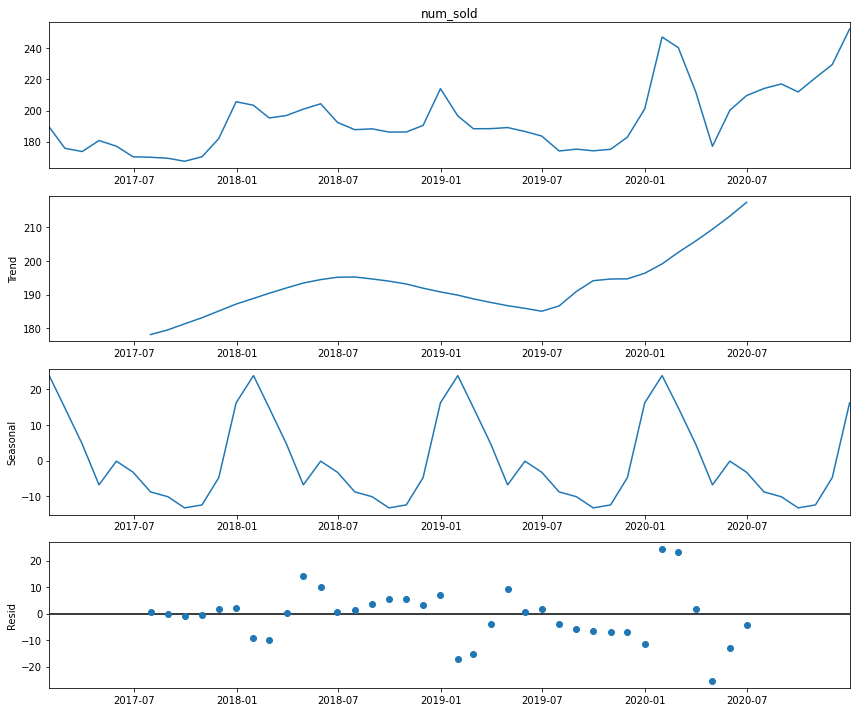

In [23]:
df2 = train_data['num_sold']
df2 = df2.resample('M').mean()
plt.rcParams["figure.figsize"] = [12, 10]
import statsmodels.api as sm
decomposed_store = sm.tsa.seasonal_decompose(df2, period=12)
figure = decomposed_store.plot()
plt.show()